In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import (
    upload_folders,
    load_dbx,
    download,
    get_dropbox_folders_prince,
)
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state, get_dropbox_folders_prince

%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import (
    upload_folders,
    load_dbx,
    download,
    get_dropbox_folders_prince,
)
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state, get_dropbox_folders_prince
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dir_drop = "/DATA/MYRISTATE/PRINCE"
all_folders_drop = get_dropbox_folders_prince(dir_drop)
# all_folders_drop = read_saved_dropbox_state("/DATA/PRINCE")

2023-11-11 11:01:47,630-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:47,879-[INFO]- dropbox:474 -> Request to files/list_folder


sizes:   0%|          | 0/68 [00:00<?, ?it/s]

2023-11-11 11:01:48,318-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:48,473-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:48,734-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:48,883-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:49,396-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:49,545-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:49,832-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:50,015-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:50,512-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:50,662-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:50,921-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:51,136-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-11 11:01:51,387-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-11 11:01:51,536-[INFO]- dropbox:

In [3]:
plates = list(all_folders_drop["unique_id"].unique())
plates

['55_20220310',
 '58_20230511',
 '62_20230511',
 '100_20220426',
 '98_20220426',
 '1_20230221',
 'faulty_param_files',
 '63_20230510',
 '61_20230510',
 '56_20230511',
 '55_20230510',
 '51_20230510',
 '49_20230510',
 '50_20230511',
 '64_20230508',
 '60_20230508',
 '59_20230508',
 '72_20230501',
 '118_20220426',
 '115_20220324',
 '109_20220324',
 '106_20220324',
 '69_20230501',
 '67_20230501',
 '68_20230501',
 '6_20230221',
 '35_20230227',
 '29_20230221',
 '25_20230221',
 '47_20230221',
 '45_20230221',
 '18_20230221',
 '42_20230221',
 '4_20230221',
 '17_20230221',
 '15_20230221',
 '5_20230306',
 '2_20230306',
 '40_20230221',
 '107_20220426',
 '119_20220426',
 '83_20220426',
 '80_20220426',
 '68_20220426',
 '60_20220310',
 '116_20220426',
 '58_20220310',
 '21_20230306',
 '37_20230221',
 '110_20220426',
 '14_20230301',
 '74_20220426',
 '34_20230227',
 '31_20230227',
 '26_20230308',
 '48_20230227',
 '13_20230221',
 '16_20230227',
 '30_20230227',
 '10_20230227',
 '33_20230221',
 '46_20230221

In [4]:
folders_drop = all_folders_drop.loc[~all_folders_drop["unique_id"].isin(plates)]

In [5]:
folders_drop = all_folders_drop

In [3]:
folders_drop = all_folders_drop.loc[
    all_folders_drop["unique_id"].isin(["faulty_param_files"])
]

In [5]:
folders_drop

folder size change_date  \
0   20230503_1521_Plate02  NaN           0   
1   20230503_1517_Plate01  NaN           0   
2   20230503_0924_Plate01  NaN           0   
3   20230503_0918_Plate02  NaN           0   
4   20230425_1348_Plate01  NaN           0   
..                    ...  ...         ...   
85  20230503_1535_Plate01  NaN           0   
86  20230307_1407_Plate01  NaN           0   
87  20230503_1531_Plate01  NaN           0   
88  20230503_1526_Plate02  NaN           0   
89  20230307_1358_Plate01  NaN           0   

                                        tot_path_drop   Plate CrossDate  \
0   data/myristate/network_extraction/faulty_param...  faulty     param   
1   data/myristate/network_extraction/faulty_param...  faulty     param   
2   data/myristate/network_extraction/faulty_param...  faulty     param   
3   data/myristate/network_extraction/faulty_param...  faulty     param   
4   data/myristate/network_extraction/faulty_param...  faulty     param   
..                                                ...     ...       ...   
85  data/myristate/network_extraction/faulty_param...  faulty     param   
86  data/myristate/network_extraction/faulty_param...  faulty     param   
87  data/myristate/network_extraction/faulty_param...  faulty     param   
88  data/myristate/network_extraction/faulty_param...  faulty     param   
89  data/myristate/network_extraction/faulty_param...  faulty     param   

             unique_id  
0   faulty_param_files  
1   faulty_param_files  
2   faulty_param_files  
3   faulty_param_files  
4   faulty_param_files  
..                 ...  
85  faulty_param_files  
86  faulty_param_files  
87  faulty_param_files  
88  faulty_param_files  
89  faulty_param_files  

[90 rows x 7 columns]

In [18]:
import shutil

directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"

for folder in folders_drop["folder"]:
    # print(os.path.join(directory_targ,folder))
    current_path = os.path.join(directory_targ, folder, "Img", "Img")
    new_folder_path = os.path.join(directory_targ, folder, "Img2")
    new_folder_path2 = os.path.join(directory_targ, folder, "Img")

    if os.path.exists(current_path):
        # if os.path.exists(os.path.join(directory_targ,folder)):
        shutil.move(current_path, new_folder_path)
        shutil.rmtree(os.path.join(directory_targ, folder, "Img"))
        shutil.move(new_folder_path, new_folder_path2)

        print(folder)
        # shutil.rmtree(os.path.join(directory_targ,folder))
        # break
        # break

20230328_1137_Plate02
20230524_1124_Plate02
20230524_1139_Plate02
20230518_1107_Plate01
20230524_1137_Plate02
20230524_1134_Plate02
20230524_1132_Plate02
20230524_0117_Plate02
20230522_1327_Plate02
20230522_1321_Plate02
20230522_1319_Plate02
20230518_1120_Plate01
20230518_1118_Plate01
20230518_1104_Plate01
20230518_1102_Plate01
20230518_1100_Plate01
20230518_1057_Plate01
20230515_1304_Plate01
20230515_1300_Plate01
20230515_1255_Plate01
20230515_1003_Plate01
20230515_0958_Plate02
20230515_0954_Plate02
20230515_0949_Plate02
20230512_0956_Plate01
20230512_0952_Plate01
20230512_0947_Plate01
20230512_0942_Plate01
20230512_0938_Plate01
20230512_0933_Plate01
20230512_0929_Plate01
61_20220324
20230512_0917_Plate01
20230512_0911_Plate01
20230508_0938_Plate01
20230508_0933_Plate01
20230508_0929_Plate01
20230504_1501_Plate03
20230504_1456_Plate01
20230504_1452_Plate02
20230503_1535_Plate01
20230503_1531_Plate01
20230503_1526_Plate02
20230313_1405_Plate01
20230503_1521_Plate02
20230503_1517_Plate0

In [12]:
len(folders_drop)

2952

In [11]:
name_job = "Myr"
directory_targ = directory_project


run_parallel_transfer(
    "from_drop.py",
    [directory_targ],
    folders_drop,
    50,
    "4:00:00",
    "staging",
    cpus=1,
    node="staging",
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397269


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397270


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397271


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397272


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397273


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397274


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397275


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397277


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397279


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397280


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397281


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397282


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397283


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397285


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397286


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397287


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397288


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397289


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397290


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397291


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397292


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397293


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397294


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397295


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397296


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397297


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397298


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397299


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397300


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397302


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397303


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397304


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397305


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397306


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397307


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397308


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397309


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397310


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397311


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397312


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397313


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397314


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397315


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397316


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397319


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397325


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397332


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397339


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397345


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397352


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397358


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397366


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397372


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397379


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397386


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397388


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397392


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397393


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397395


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4397396


In [9]:
plates = list(all_folders_drop["unique_id"])

In [6]:
directory_targ = directory_project
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/5094 [00:00<?, ?it/s]

In [17]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
print(len(folders))
folders = folders[folders["/Analysis/skeleton_realigned_compressed.mat"] == False]
print(len(folders))

2237
1451


In [18]:
folders["unique_id"].unique()

array(['62_20230511', '49_20230510', '60_20230508', '68_20230501',
       '14_20230301', '58_20230511', '1_20230221'], dtype=object)

In [8]:
folders = all_folders.loc[all_folders["medium"].str.contains("Myr")]
folders = folders.sort_values(by="datetime")

len(folders)

28

In [19]:
# folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
# dir_drop = "DATA/PRINCE"
dir_drop = "DATA/MYRISTATE/PRINCE"
name_job = "load_back"
delete = True
run_parallel_transfer(
    "toward_drop.py",
    [dir_drop, delete],
    folders,
    50,
    "4:00:00",
    "staging",
    cpus=1,
    node="staging",
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421190


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421191


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421192


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421193


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421194


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421195


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421196


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421197


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421198


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421199


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421200


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421201


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421202


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421203


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421204


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421205


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421206


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421207


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421208


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421209


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421210


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421211


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421212


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421213


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421214


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421215


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421216


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421217


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421218


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4421219


In [22]:
folders = all_folders.loc[all_folders["medium"].str.contains("Myr")]

folders = folders.loc[folders["/Analysis/nx_graph_pruned.p"] == True]
len(folders)

75

In [30]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.loc[folders["/Analysis/skeleton_realigned_compressed.mat"] == True]
num_parallel = 128
time = "2:00:00"
skip = False
resolution = 10
args = [directory_targ, skip, resolution]
run_parallel(
    "extract_width.py",
    args,
    folders,
    num_parallel,
    time,
    "extract_width2",
    cpus=128,
    node="fat",
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1.0 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2911477


In [20]:
name_job = "fixing"
num_parallel = 128
time = "30:00"
args = [directory_targ]
run_parallel(
    "extract_nx_graph.py",
    args,
    folders,
    num_parallel,
    time,
    "extract_nx",
    cpus=128,
    node="fat",
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1.0 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2811657


In [51]:
dir_drop = "DATA/MYRISTATE/Network_extraction"

delete = True
run_parallel_transfer(
    "toward_drop.py",
    [dir_drop, delete],
    folders,
    50,
    "4:00:00",
    "staging",
    cpus=1,
    node="staging",
    name_job="hannah",
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.03125 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2752744


In [5]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
)

In [37]:
exp = Experiment(directory_targ)
exp.load(folders.iloc[1:2], suffix="")
exp.dates.sort()
for t in range(exp.ts):
    exp.load_tile_information(t)

for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False, suffix="")
# import networkx as nx
# G = exp.nx_graph[t]
# largest_cc = max(nx.connected_components(G), key=len)
# exp.nx_graph[t] = G.subgraph(largest_cc).copy()

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-03-07 15:47:00


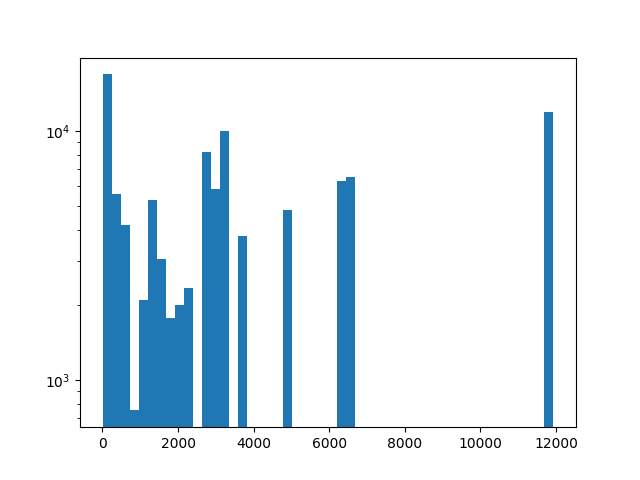

In [44]:
import numpy as np
import matplotlib.pyplot as plt

edges = get_all_edges(exp, t)

lengths = [edge.length_um(0) for edge in edges]
fig, ax = plt.subplots()
ax.hist(lengths, 50, weights=lengths)
ax.set_yscale("log")

In [38]:
import numpy as np
import matplotlib.pyplot as plt

widths = [edge.width(0) for edge in edges]
fig, ax = plt.subplots()
ax.hist(widths, 50)
ax.set_yscale("log")

KeyError: 'width'

In [39]:
import networkx as nx


def get_largest_components(graph, num_components):
    components = list(nx.connected_components(graph))
    largest_components = sorted(components, key=len, reverse=True)[:num_components]
    return [graph.subgraph(comp) for comp in largest_components]


def create_combined_graph(graph, num_components):
    largest_components = get_largest_components(graph, num_components)
    G = largest_components[0]
    for g in largest_components[1:]:
        G = nx.compose(G, g)
    return G

In [40]:
exp.nx_graph[t] = create_combined_graph(exp.nx_graph[t], 2)

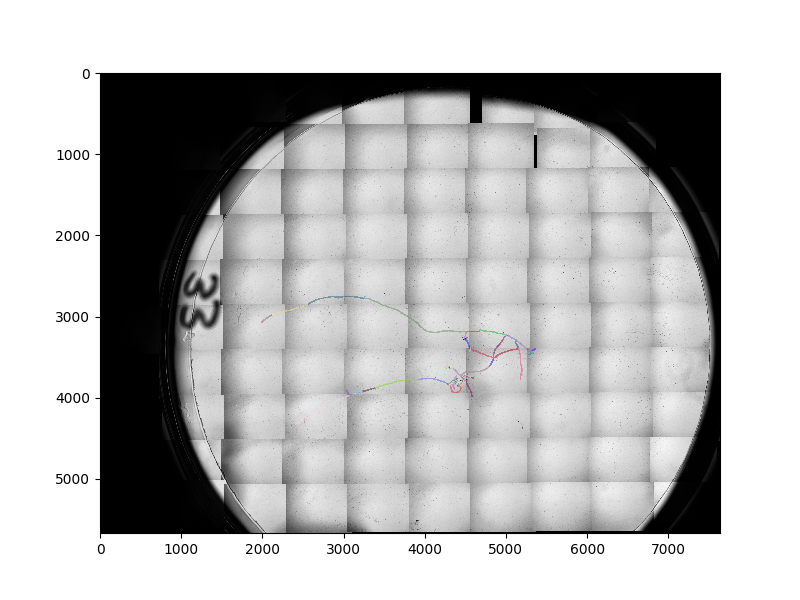

<AxesSubplot:>

In [41]:
%matplotlib widget
edges = get_all_edges(exp, t)

# edges_plot = [edge for edge in edges if edge.width(0) > 5]
# edges_plot = [edge for edge in edges if edge.length_um(0) > 1000]

edges_plot = edges
plot_full(
    exp,
    t,
    downsizing=5,
    edges=edges_plot,
    dilation=15,
    prettify=False,
    figsize=(8, 6),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

In [22]:
[edge for edge in edges_plot if edge.length_um(0) > 1000]

[Edge(1135,900),
 Edge(1205,1215),
 Edge(1244,1269),
 Edge(1244,897),
 Edge(1326,1481)]

In [48]:
10 * 4096 * 1.725

70656.0

In [20]:
45**2 / 2, 30**2

(1012.5, 900)

In [20]:
3000 * 1.725

5175.0

In [45]:
print("length=", np.sum([edge.length_um(0) for edge in edges_plot]) / 1000, "mm")

length= 101.23600211521901 mm


In [46]:
print(
    "length=",
    np.sum([edge.length_um(0) for edge in edges_plot if edge.length_um(0) > 1000])
    / 1000,
    "mm",
)

length= 72.8741864281532 mm


In [47]:
1

1

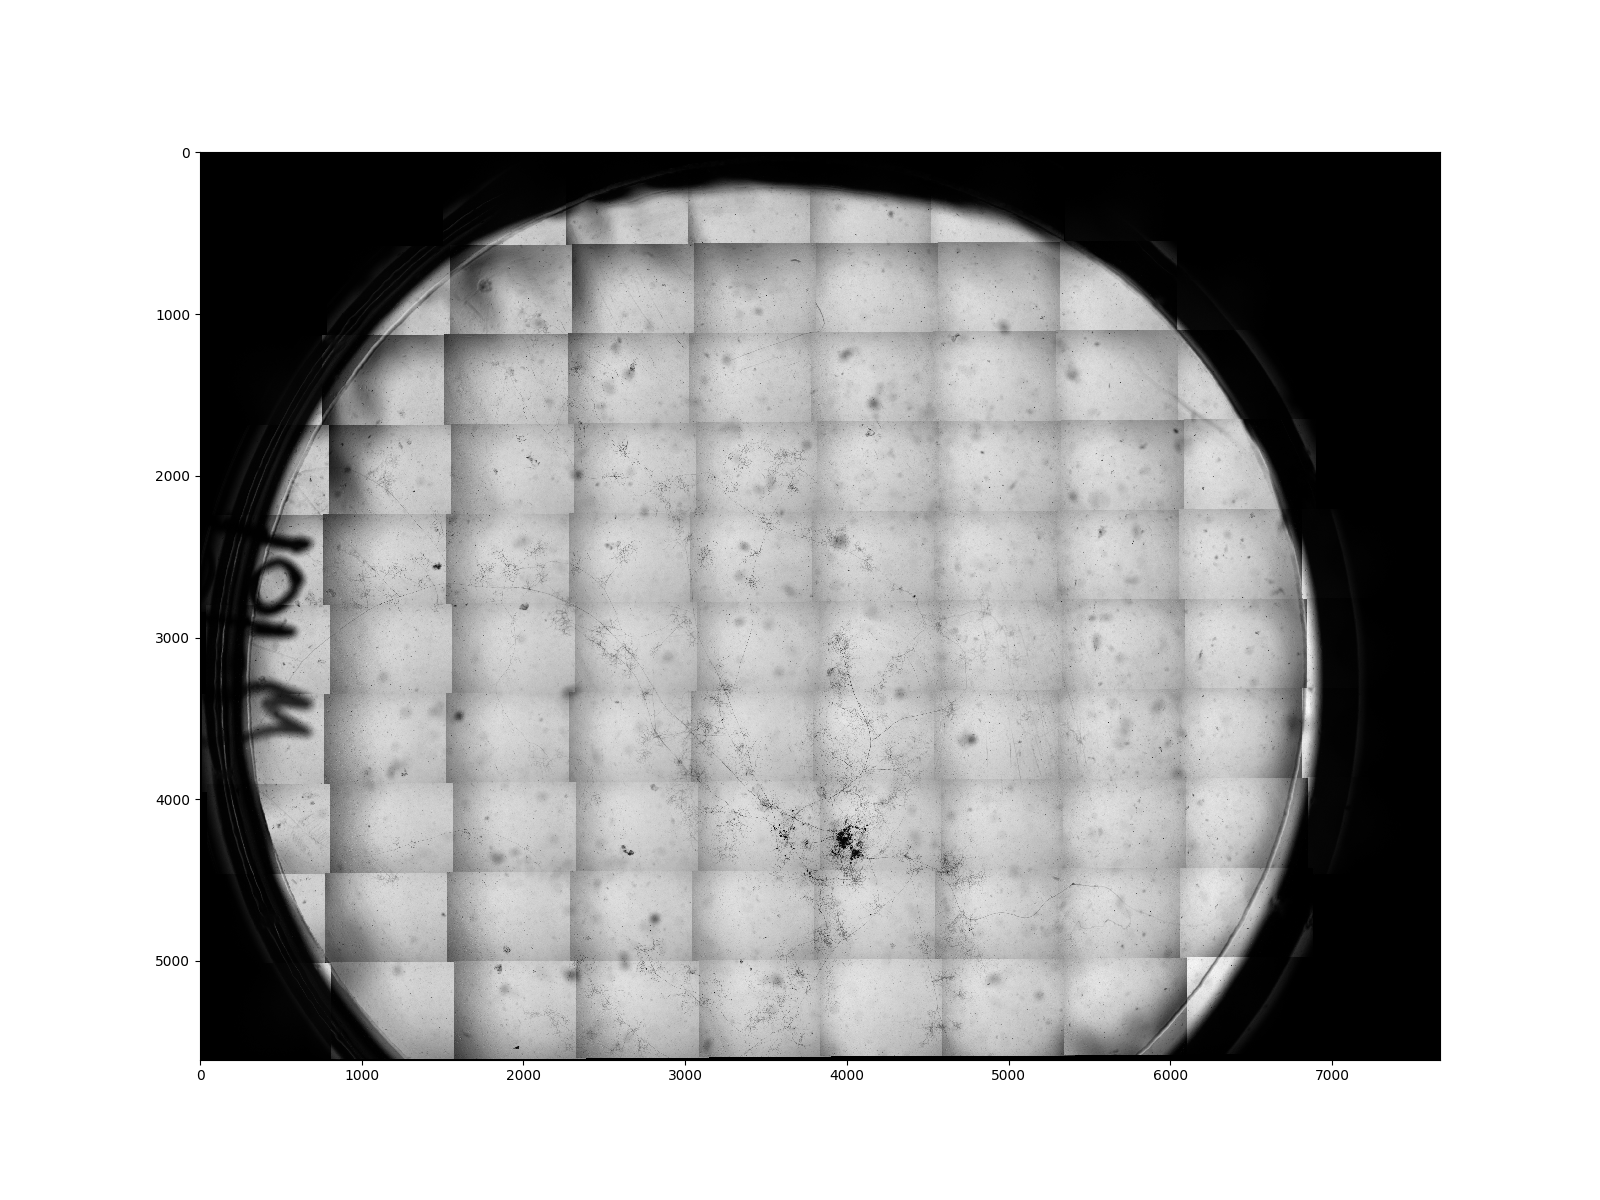

<AxesSubplot:>

In [82]:
plot_full(
    exp,
    t,
    downsizing=5,
    dilation=4,
    prettify=False,
    figsize=(16, 12),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

In [12]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)
import pandas as pd

directory = directory_targ
i = 1
folder_list = list(folders["folder"])
folder_list.sort()
directory_name = folder_list[i]
print(directory_name)
# run_back_sub(directory, directory_name)
path_snap = os.path.join(directory, directory_name)
path_tile = os.path.join(path_snap, "Img/TileConfiguration.txt.registered")
try:
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
except:
    print("error_name")
    path_tile = os.path.join(path_snap, "Img/TileConfiguration.registered.txt")
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
dirName = path_snap + "/Analysis"
try:
    os.mkdir(path_snap + "/Analysis")
    print("Directory ", dirName, " Created ")
except FileExistsError:
    print("Directory ", dirName, " already exists")
xs = [c[0] for c in tileconfig[2]]
ys = [c[1] for c in tileconfig[2]]
name = tileconfig[0][0]
imname = "/Img3/" + name.split("/")[-1]
im = imageio.imread(directory + directory_name + imname)
dim = (
    int(np.max(ys) - np.min(ys)) + max(im.shape),
    int(np.max(xs) - np.min(xs)) + max(im.shape),
)
ims = []
skel = np.zeros(dim, dtype=np.uint8)
params = [30]

20230307_1547_Plate01
Directory  /scratch-shared/amftrack/stitch_temp2/20230307_1547_Plate01/Analysis  already exists


/scratch-shared/amftrack/stitch_temp2//20230307_1547_Plate01//Img2/Img_r06_c07.tif


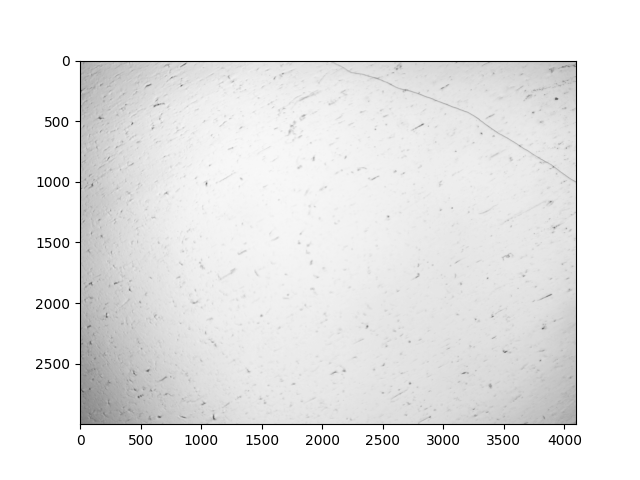

In [36]:
j = 46

for index, name in enumerate(tileconfig[0][j : j + 1]):
    # for index, name in enumerate(list_debug):
    print(name)
    imname = "/Img3/" + name.split("/")[-1]
    im = imageio.imread(directory + directory_name + imname)
    imname2 = "/Img/" + name.split("/")[-1]
    im2 = imageio.imread(directory + directory_name + imname2)
    bowled2 = bowler_hat(-im2, 32, params)
    im[bowled2 <= 0.09] = np.maximum(im[bowled2 <= 0.09], 250)
    fig, ax = plt.subplots()
    ax.imshow(-im2, cmap="Greys")
    # shape = im.shape
    # print("segmenting")
    # segmented = extract_skel_new_prince(im, [hyph_width], perc_low, perc_high)
    # # low = np.percentile(-im+255, perc_low)
    # # high = np.percentile(-im+255, perc_high)
    # # segmented = filters.apply_hysteresis_threshold(-im+255, low, high)
    # boundaries = int(tileconfig[2][index][0] - np.min(xs)), int(
    #     tileconfig[2][index][1] - np.min(ys)
    # )
    # skel[
    #     boundaries[1] : boundaries[1] + shape[0],
    #     boundaries[0] : boundaries[0] + shape[1],
    # ] += segmented

In [30]:
from amftrack.pipeline.functions.image_processing.extract_skel import *

hyph_width = 20
perc_low = 90
perc_high = 99.5
bowled = bowler_hat(-im.astype(np.uint8), 32, [hyph_width])
filename = time_ns()
place_save = temp_path
to_smooth = np.minimum(bowled * 255, 255 - im)
# to_smooth = 255-im
imtransformed_path = f"{place_save}/{filename}.tif"
imageio.imsave(imtransformed_path, to_smooth.astype(np.uint8))
path_anis = pastis_path
args = [0.1, 7, 0.9, 10, 50]
command = [path_anis, imtransformed_path] + args
command = [str(elem) for elem in command]
print("anis filtering")
process = subprocess.run(command, cwd=place_save, stdout=subprocess.DEVNULL)
foldname = f"{filename}_ani-K{int(args[0]*10)}s{args[1]}g{int(args[2]*10)}itD{args[3]}"
imname = foldname + f"/{foldname}it{args[4]}.tif"
path_modif = place_save + "/" + imname
try:
    im3 = imageio.imread(path_modif)
except:
    im3 = to_smooth.astype(np.uint8)
print("image_reading")
# shutil.rmtree(os.path.join(place_save, foldname))
low = max(15, np.percentile(im3, perc_low))
high = max(50, np.percentile(im3, perc_high))
transformed = im3
hyst = filters.apply_hysteresis_threshold(transformed, low, high)
dilated = remove_holes(hyst)
dilated = dilated.astype(np.uint8)
connected = remove_component(dilated)

anis filtering
image_reading


In [23]:
high

23.0

In [37]:
hyph_width = 20
perc_low = 90
perc_high = 99.5
minlow = 15
minhigh = 50
connected = extract_skel_new_prince(
    im, [hyph_width], perc_low, perc_high, minlow, minhigh
)

anis filtering
image_reading


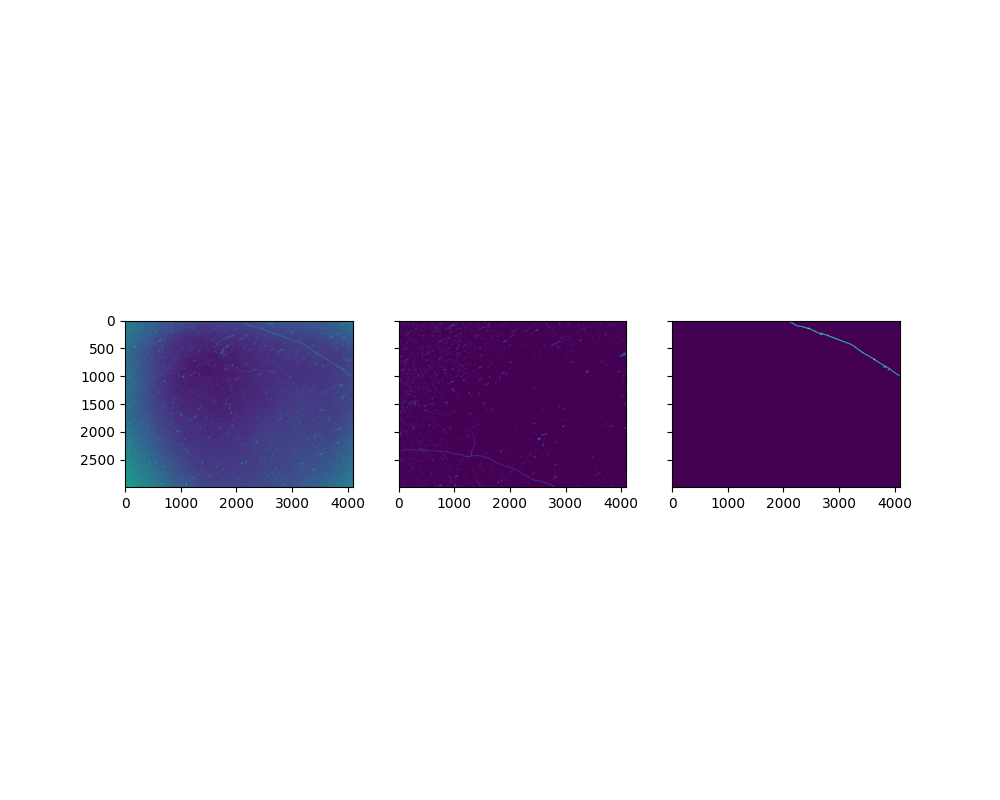

In [38]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 8))
ax[0].imshow(-im2)
ax[1].imshow(im3)
ax[2].imshow(connected)

In [55]:
_, labels = cv2.connectedComponents(connected)

# Iterate over each component and filter based on criteria
filtered_image = np.zeros_like(connected)
for component_label in range(1, labels.max() + 1):
    # Get the mask for the current component
    component_mask = np.uint8(labels == component_label)

    # Calculate the convex hull of the component
    contours, _ = cv2.findContours(
        component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    hull = cv2.convexHull(contours[0])

    # Calculate area and long and short axes of the convex hull
    area = cv2.contourArea(hull)
    (_, _), (long_axis, short_axis), _ = cv2.fitEllipse(hull)
    if area >= 10000 and (np.sum(component_mask) / area < 0.2 or short_axis < 100):
        filtered_image += component_mask
    print(area, np.sum(component_mask) / area, short_axis)

3610093.0 0.14695826395608091 3328.963623046875
47035.0 0.4295524609333475 372.7042541503906
97306.5 0.19924671013755504 585.113525390625
6157.5 0.7108404384896467 180.9369659423828
23431.5 0.38896357467511683 267.3442077636719
16105.5 0.5467697370463507 342.86822509765625
18445.0 0.4448902141501762 200.67098999023438
20918.0 0.464814991873028 199.71414184570312
6585.5 0.7073115177283426 133.7173614501953
51664.0 0.5958307525549705 386.0409240722656


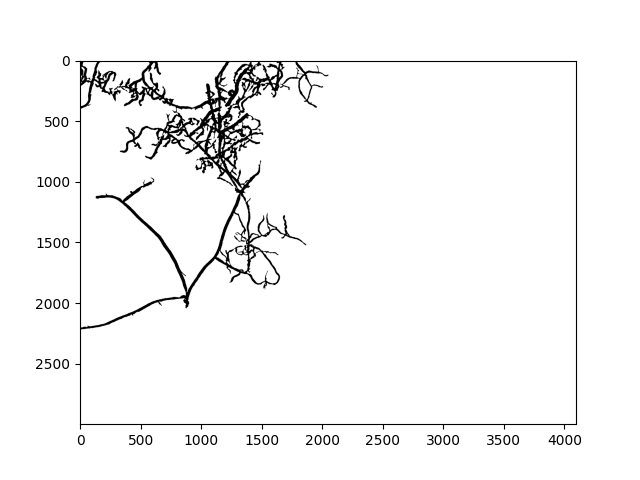

In [56]:
fig, ax = plt.subplots()
ax.imshow(filtered_image, cmap="Greys")

In [18]:
name_job = "Myr"

# name_job = f"one_shot_{time_ns()}.sh"

run_launcher(
    "stitcher.py",
    [directory_targ, name_job, -1],
    plates,
    "12:00:00",
    dependency=True,
    name_job=name_job,
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4399164


In [10]:
directory = directory_targ

In [17]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 10
start = 1

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    # print(folder)
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_realigned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)

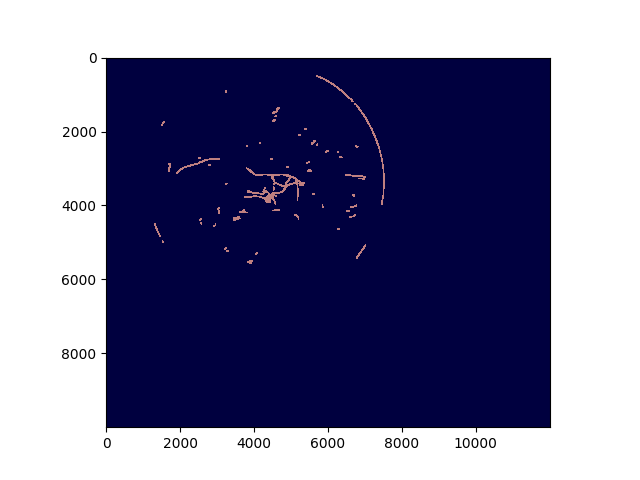

In [18]:
plt.close("all")
start = 0
finish = start + 1
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], skels[i])